In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Loaded the dataset into a pandas dataframe
data = pd.read_csv("Spotify_Data.csv" , encoding="latin1")
# Dimensions of the dataset before cleaning
print(data.shape)

(4600, 29)


In [3]:
data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [4]:
data.drop_duplicates(inplace=True)
# Dimensions of the dataset after cleaning
print(data.shape)

(4598, 29)


In [5]:
data.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4598.000000,3794.000000,4037.000000,3677.000000,3543.000000,0.0,4598.000000
mean,41.850892,63.498682,54.613574,32.321730,25.346034,NaN,0.359069
std,38.550706,16.189952,71.628469,54.287051,25.993157,NaN,0.479780
min,19.400000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.000000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.000000,15.000000,17.000000,NaN,0.000000
75%,44.475000,73.000000,70.000000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.000000,632.000000,210.000000,NaN,1.000000


In [6]:
data.drop("TIDAL Popularity",axis=1,inplace=True)
data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4598 non-null   object 
 1   Album Name                  4598 non-null   object 
 2   Artist                      4593 non-null   object 
 3   Release Date                4598 non-null   object 
 4   ISRC                        4598 non-null   object 
 5   All Time Rank               4598 non-null   object 
 6   Track Score                 4598 non-null   float64
 7   Spotify Streams             4485 non-null   object 
 8   Spotify Playlist Count      4528 non-null   object 
 9   Spotify Playlist Reach      4526 non-null   object 
 10  Spotify Popularity          3794 non-null   float64
 11  YouTube Views               4290 non-null   object 
 12  YouTube Likes               4283 non-null   object 
 13  TikTok Posts                3425 non-n

In [8]:
cleaned_data = data.drop(["Soundcloud Streams","SiriusXM Spins"],axis=1)
cleaned_data.describe()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4598 non-null   object 
 1   Album Name                  4598 non-null   object 
 2   Artist                      4593 non-null   object 
 3   Release Date                4598 non-null   object 
 4   ISRC                        4598 non-null   object 
 5   All Time Rank               4598 non-null   object 
 6   Track Score                 4598 non-null   float64
 7   Spotify Streams             4485 non-null   object 
 8   Spotify Playlist Count      4528 non-null   object 
 9   Spotify Playlist Reach      4526 non-null   object 
 10  Spotify Popularity          3794 non-null   float64
 11  YouTube Views               4290 non-null   object 
 12  YouTube Likes               4283 non-null   object 
 13  TikTok Posts                3425 non-n

In [9]:
print(cleaned_data.isnull().sum())

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Shazam Counts                  577
Explicit Track                   0
dtype: int64


In [10]:
# Drop all columns with more than 1000 null values
cleaned_data = cleaned_data.loc[:, cleaned_data.isna().sum() <= 1000]
cleaned_data.isnull().sum()
cleaned_data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Likes',
       'TikTok Views', 'Apple Music Playlist Count', 'AirPlay Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach', 'Shazam Counts',
       'Explicit Track'],
      dtype='object')

## Remaining Columns
Based on the remaining columns that have less than 1000 null values we will remove all the columns that do not fit our needs of looking at streams/views (i.e YouTube Likes, TikTok Likes)


In [11]:

cleaned_data.drop({"Spotify Playlist Count","Spotify Playlist Reach", "Spotify Popularity" , "YouTube Likes" , "TikTok Likes", "Deezer Playlist Count", "Deezer Playlist Reach"},axis=1,inplace=True)
cleaned_data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams', 'YouTube Views',
       'TikTok Views', 'Apple Music Playlist Count', 'AirPlay Spins',
       'Shazam Counts', 'Explicit Track'],
      dtype='object')

In [12]:
# Step 1: Select relevant features (excluding Track Score)
feature_cols = [
    'Spotify Streams', 'YouTube Views', 'TikTok Views',
    'Apple Music Playlist Count', 'AirPlay Spins', 'Shazam Counts'
]

# Step 2: Copy data and clean
df = cleaned_data.copy()

# Clean all relevant columns including 'Track Score'
for col in feature_cols + ['Track Score']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Drop rows with missing values in any of these columns
df = df.dropna(subset=feature_cols + ['Track Score'])

# Step 4: Separate features and target
X = df[feature_cols]
y = df['Track Score']

# Step 5: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: PCA transformation
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 7: Create PCA DataFrame and append 'Track Score'
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['Track Score'] = y.values

In [13]:
# Show correlation between each principal component and Track Score
correlations = pca_df.corr()['Track Score'].drop('Track Score')
print("Correlation between PCA components and Track Score:")
print(correlations.sort_values(ascending=False))





Correlation between PCA components and Track Score:
PC1    0.387599
PC4    0.225510
PC2    0.121805
PC6    0.104000
PC5   -0.070945
PC3   -0.104347
Name: Track Score, dtype: float64


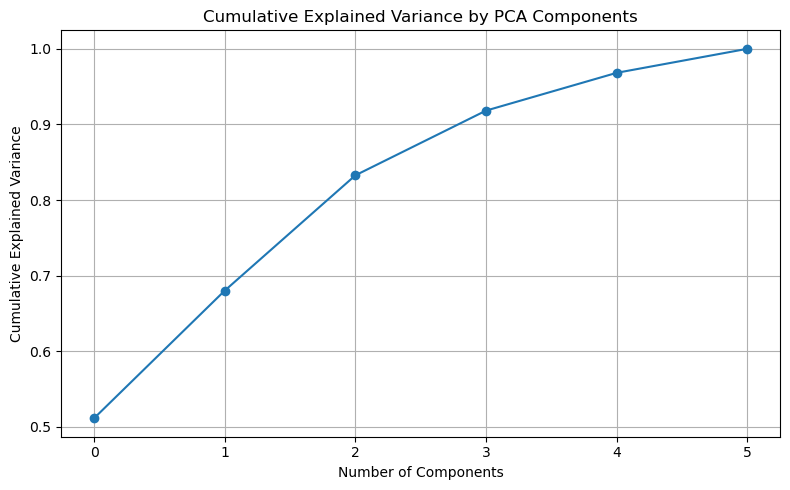

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

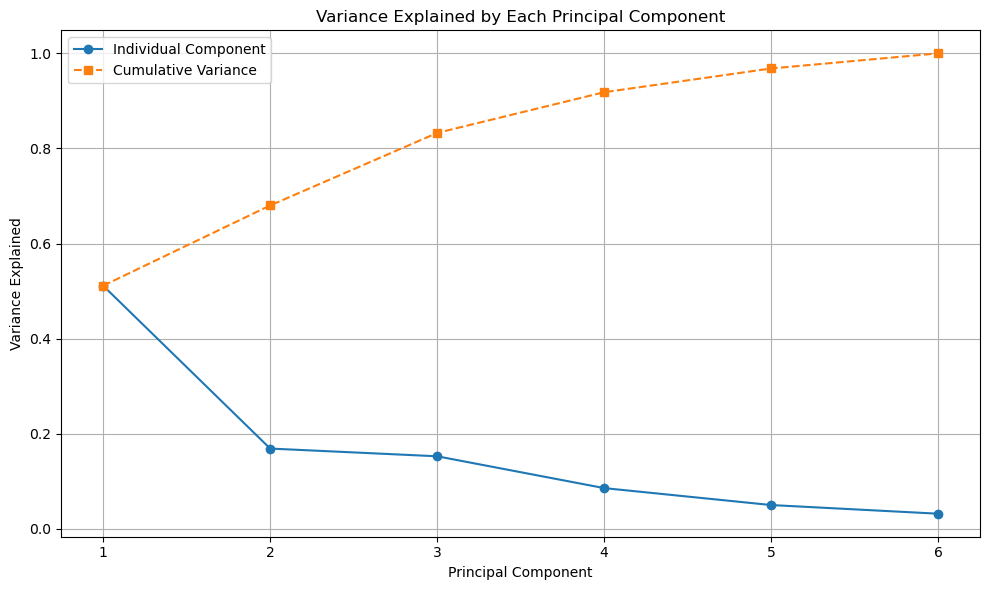

In [16]:
# Get explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Individual Component')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', linestyle='--', label='Cumulative Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

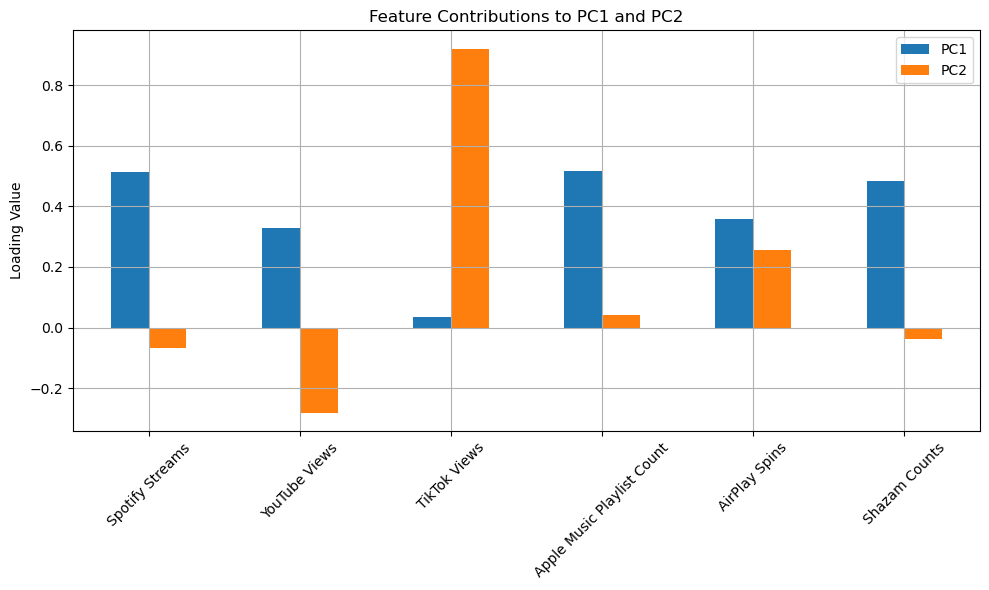

In [18]:
import seaborn as sns

# Define loadings (contributions of each feature to each principal component)
loadings = pd.DataFrame(
    pca.components_.T,  # transpose to get features as rows
    index=X.columns,    # use feature names as index
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Plot top 2 principal components' loadings
plt.figure(figsize=(10, 6))
loadings[['PC1', 'PC2']].plot(kind='bar', figsize=(10, 6))
plt.title('Feature Contributions to PC1 and PC2')
plt.ylabel('Loading Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
